In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import operator

In [2]:
weather=pd.read_csv('../input/szeged-weather/weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

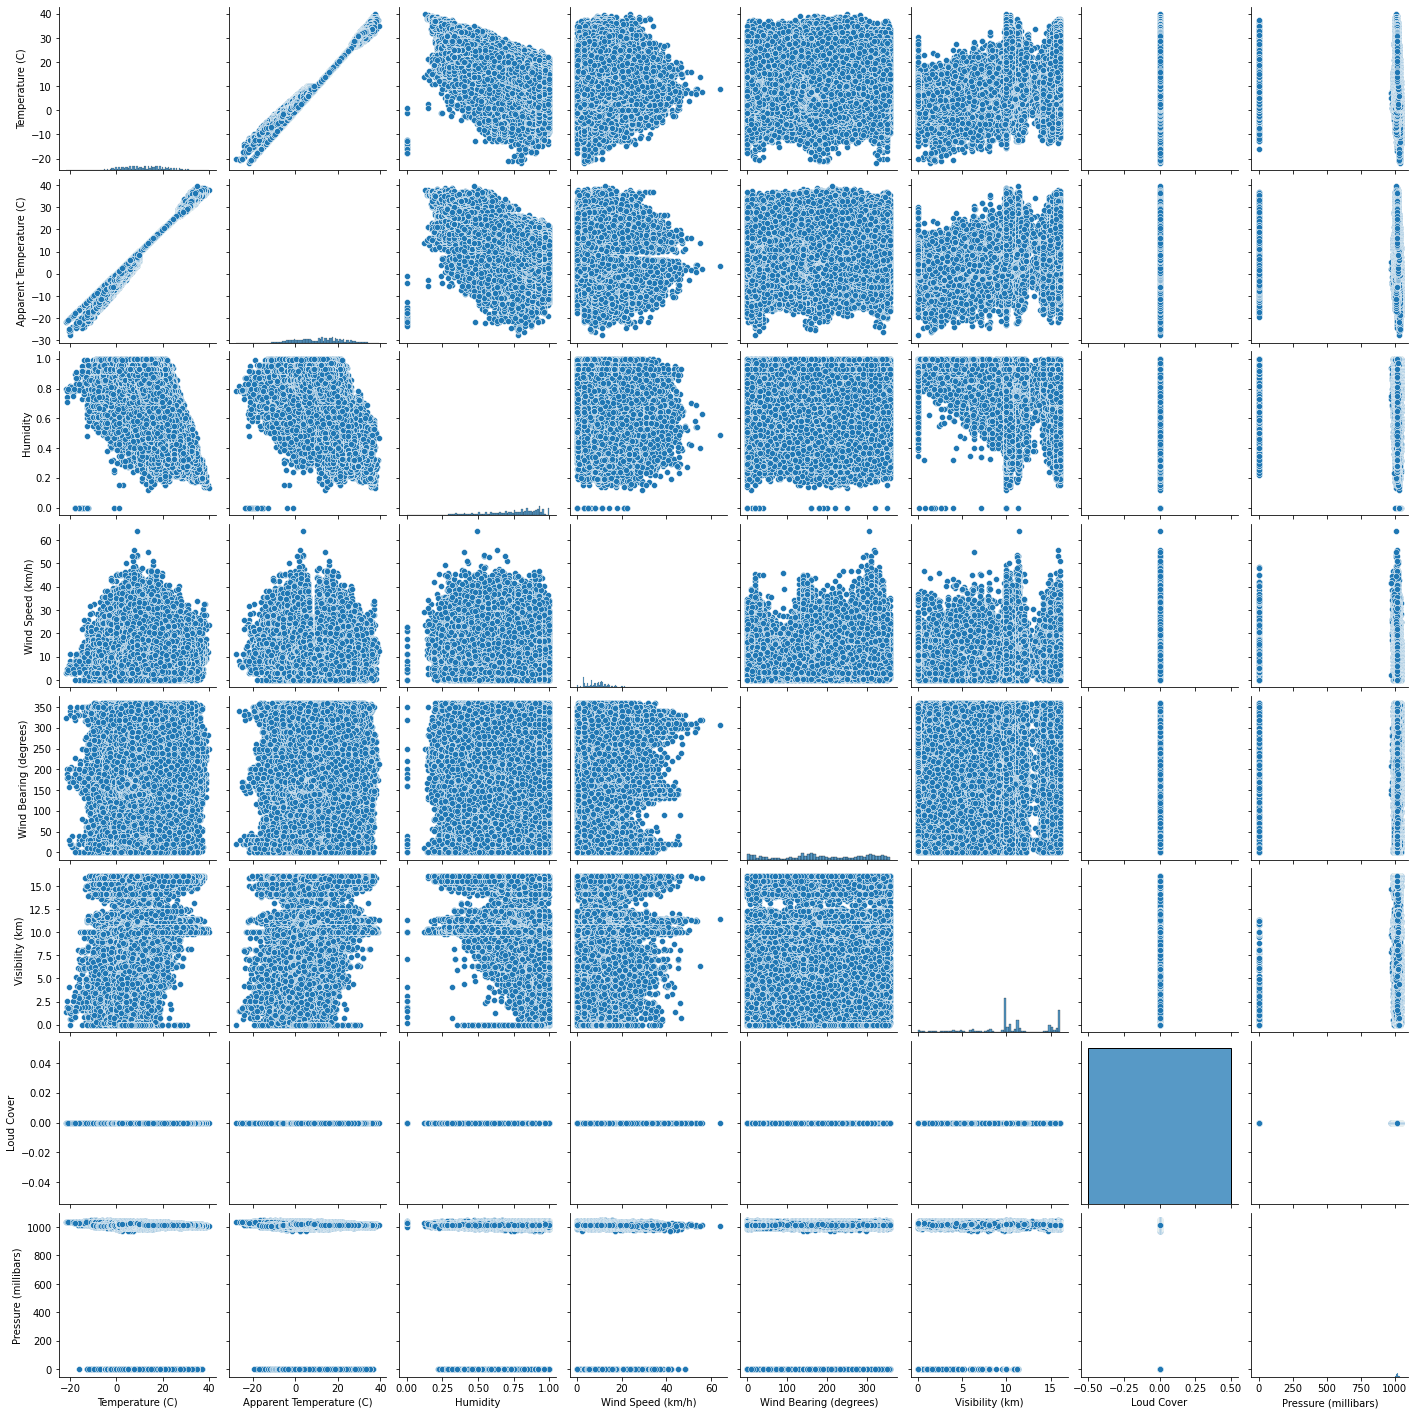

In [6]:
sns.pairplot(weather)

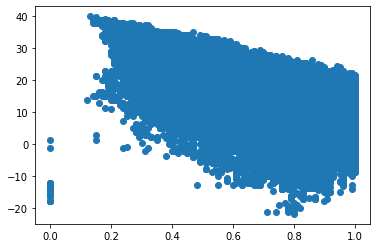

In [7]:
plt.scatter(x='Humidity',y='Temperature (C)',data=weather)

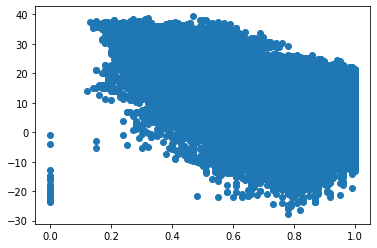

In [8]:
plt.scatter(x='Humidity',y='Apparent Temperature (C)',data=weather)

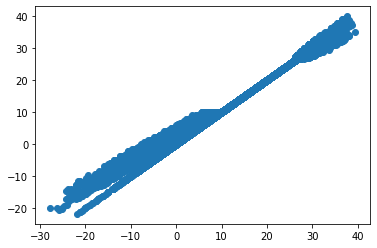

In [9]:
plt.scatter(x='Apparent Temperature (C)',y='Temperature (C)',data=weather)

In [10]:
temp=weather[['Humidity','Temperature (C)','Apparent Temperature (C)']]

In [11]:
temp=temp[:][:500]
temp

,Humidity,Temperature (C),Apparent Temperature (C)
0,0.89,9.472222,7.388889
1,0.86,9.355556,7.227778
2,0.89,9.377778,9.377778
3,0.83,8.288889,5.944444
4,0.83,8.755556,6.977778
...,...,...,...
495,0.43,21.177778,21.177778
496,0.41,21.227778,21.227778
497,0.45,20.100000,20.100000
498,0.51,19.027778,19.027778


<AxesSubplot:>

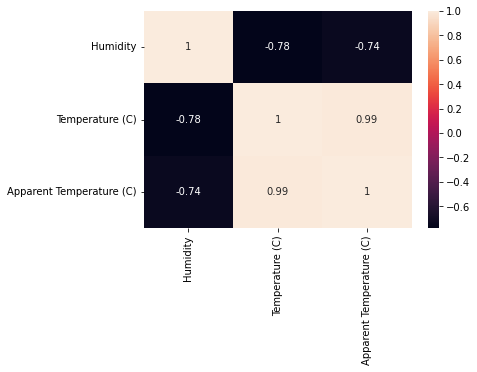

In [12]:
sns.heatmap(temp.corr(),annot=True)

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
x=temp.drop('Humidity',axis=1)
y=temp['Humidity']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=500)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 2)
(400,)
(100, 2)
(100,)


# LINEAR REGRESSION

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(r2_score(y_train,y_pred_train))
print('*'*20)
print(r2_score(y_test,y_pred_test))

0.6430010418976927
********************
0.6696462442228122


In [21]:
print(lr.intercept_)
print('*****')
print(lr.coef_)

1.2129794515473769
*****
[-0.07284708  0.03944204]


In [22]:
cross_val_score(lr,x,y,cv=10,scoring='r2').mean()

0.15685172165224487

In [23]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [24]:
lr_model=sf.OLS(endog=y_train,exog=x_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Humidity   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              932.2
Date:                Sat, 23 Jul 2022   Prob (F-statistic):                   6.62e-151
Time:                        06:32:09   Log-Likelihood:                         -109.35
No. Observations:                 400   AIC:                                      222.7
Df Residuals:                     398   BIC:                                      230.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Temperature (C)              0.2248      0.016     14.008      0.000       0.193       0.256
Apparent Temperature (C)    -0.1812      0.016    -11.161      0.000      -0.213      -0.149
==============================================================================
Omnibus:                       15.611   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.906
Skew:                          -0.424   Prob(JB):                     0.000580
Kurtosis:                       2.580   Cond. No.                         29.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Density'>

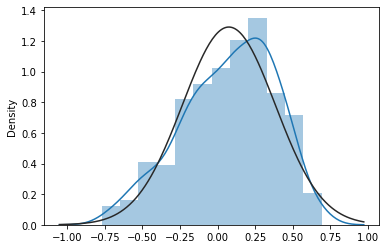

In [25]:
from scipy import stats
sns.distplot(lr_model.resid,fit=stats.norm)

<AxesSubplot:>

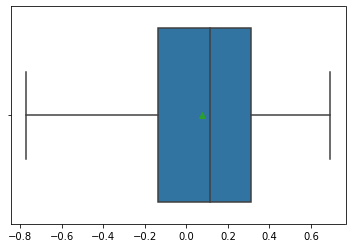

In [26]:
sns.boxplot(lr_model.resid,showmeans=True)

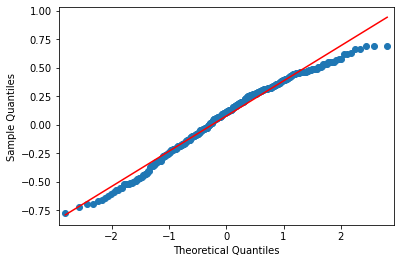

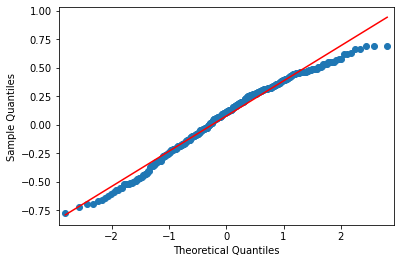

In [27]:
import statsmodels.api as sm
sm.qqplot(lr_model.resid,line='s')

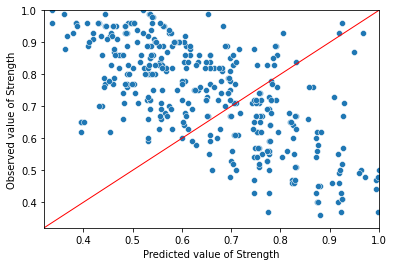

In [28]:
Y_max = y.max()
Y_min = y.min()
ax = sns.scatterplot(lr_model.fittedvalues, y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

# POLYNOMIAL REGRESSION

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly=PolynomialFeatures(degree=4)
poly_df=poly.fit_transform(x_train)
lr_poly=LinearRegression()
lr_poly.fit(poly_df,y_train)

LinearRegression()

In [31]:
y_pred_poly=lr_poly.predict(poly_df)

In [32]:
print(r2_score(y_train,y_pred_poly))

0.6814680783117921


In [44]:
x_train=np.arange(0,len(x_train),1)

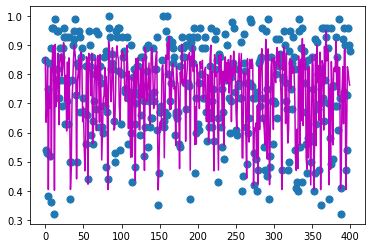

In [45]:
plt.scatter(x_train, y_train, s=50)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_pred_poly), key=sort_axis)
X_train,y_pred_poly= zip(*sorted_zip)
plt.plot(x_train,y_pred_poly, color='m')
plt.show()

# DECISION TREE REGRESSION

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred_dt_train=dt.predict(x_train)
y_pred_dt_test=dt.predict(x_test)

In [36]:
print(r2_score(y_train,y_pred_dt_train))
print('*'*20)
print(r2_score(y_test,y_pred_dt_test))

0.9689355318602517
********************
0.44231713712530485


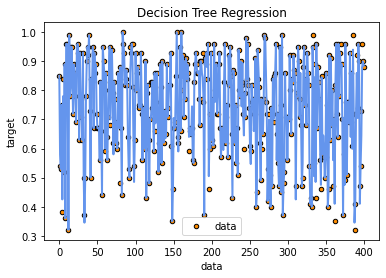

In [46]:
plt.figure()
plt.scatter(x_train,y_train,s=20,edgecolor="black",c="darkorange",label="data")
plt.plot(x_train,y_pred_dt_train,color="cornflowerblue",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# RANDOM FOREST REGRESSION

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

In [40]:
print(r2_score(y_train,y_pred_rf_train))
print('*'*20)
print(r2_score(y_test,y_pred_rf_test))

0.9305099241206759
********************
0.6078518968530211


# DEEP NEURAL NETWORK

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
tf.__version__

'2.6.4'

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [47]:
x= pd.DataFrame(sc_x)
x.head(3)

,0,1
0,-0.925642,-1.153725
1,-0.951263,-1.185166
2,-0.946383,-0.765594


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=500)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 2)
(400,)
(100, 2)
(100,)


In [49]:
DNN=tf.keras.models.Sequential()
DNN.add(tf.keras.layers.Dense(units=20,activation='relu'))
DNN.add(tf.keras.layers.Dense(units=20,activation='relu'))
DNN.add(tf.keras.layers.Dense(units=1))
DNN.compile(optimizer='adam',loss='mean_squared_error')
DNN.fit(x_train,y_train,batch_size=32,epochs=100)

2022-07-23 06:33:30.123620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:33:30.247791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:33:30.248554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:33:30.250284: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.3734
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1270
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 13/100
13/13 [=================

In [50]:
y_pred_DNN=DNN.predict(x_test)
print(y_test)
print('*'*10)
print(y_pred_DNN)

57     0.79
70     0.96
364    0.96
108    0.70
318    0.93
       ... 
215    0.85
132    0.58
290    0.95
443    0.53
124    0.94
Name: Humidity, Length: 100, dtype: float64
**********
[[0.812564  ]
 [0.8566569 ]
 [0.8673078 ]
 [0.8162757 ]
 [0.8349359 ]
 [0.41649577]
 [0.8347516 ]
 [0.71752167]
 [0.8286743 ]
 [0.7089014 ]
 [0.5804684 ]
 [0.85247767]
 [0.81141293]
 [0.8522191 ]
 [0.89959776]
 [0.8536079 ]
 [0.85942173]
 [0.5462454 ]
 [0.85105526]
 [0.63169134]
 [0.8392149 ]
 [0.8419111 ]
 [0.8534993 ]
 [0.8276713 ]
 [0.46905497]
 [0.541548  ]
 [0.83337986]
 [0.46527502]
 [0.6551752 ]
 [0.8294898 ]
 [0.5880736 ]
 [0.85731447]
 [0.84407735]
 [0.57331073]
 [0.6560441 ]
 [0.49749455]
 [0.8603424 ]
 [0.82735026]
 [0.4659949 ]
 [0.8257935 ]
 [0.8523177 ]
 [0.85124433]
 [0.80724716]
 [0.42693558]
 [0.82405853]
 [0.8454094 ]
 [0.7630582 ]
 [0.9054171 ]
 [0.6061919 ]
 [0.41361582]
 [0.5941131 ]
 [0.5003743 ]
 [0.71608496]
 [0.860528  ]
 [0.8536079 ]
 [0.8126526 ]
 [0.5507189 ]
 [0.3776165 ]
 

In [51]:
print(r2_score(y_test,y_pred_DNN))

0.6868813685016104
